In [1]:
# https://gemgis.readthedocs.io/en/latest/getting_started/tutorial/14_visualizing_topography_and_maps_with_pyvista.html

import pyvista as pv
pv.rcParams['transparent_background'] = True


In [2]:
pv.set_jupyter_backend('static')

In [3]:
import geopandas as gpd
import gemgis as gg 

c:\Users\user\Desktop\icarus-1\.conda\lib\site-packages\pyproj\__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()
C:\Users\user\AppData\Local\Temp\ipykernel_1852\3786279706.py:1: DeprecationWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas still uses PyGEOS by default. However, starting with version 0.14, the default will switch to Shapely. To force to use Shapely 2.0 now, you can either uninstall PyGEOS or set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In the next release, GeoPandas will switch to using Shapely by default, even if PyGEOS is installed. If you only have PyGEOS installed to get speed-ups, this switch should be smooth. However, if you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop wor

In [4]:
# create temporary directory
import pathlib
import tempfile
import os

In [5]:
if 'temp_root_dir' in locals() and temp_root_dir is not None:
    temp_root_dir.cleanup()
    temp_root_path = None
    temp_root_dir = None

temp_root_dir = tempfile.TemporaryDirectory(ignore_cleanup_errors=True)
temp_root_path = pathlib.Path(temp_root_dir.name)

In [6]:
# download file
data_path = temp_root_path / "14_visualizing_topography_and_maps_with_pyvista"
gg.download_gemgis_data.download_tutorial_data(filename="14_visualizing_topography_and_maps_with_pyvista.zip", dirpath=str(data_path.absolute()) + os.sep)


In [7]:
mesh = gg.visualization.read_raster(path=str(data_path.joinpath('DEM50.tif')),
                                    nodata_val=9999.0,
                                    name='Elevation [m]')

mesh

StructuredGrid (0x1c8fa635ae0)
  N Cells:      5595201
  N Points:     5600000
  X Bounds:     3.236e+07, 3.250e+07
  Y Bounds:     5.700e+06, 5.800e+06
  Z Bounds:     0.000e+00, 0.000e+00
  Dimensions:   2000, 2800, 1
  N Arrays:     1

In [8]:
import rasterio

dem = rasterio.open(data_path.joinpath('DEM50.tif'))
dem.read(1)

array([[  0.  ,   0.  ,   0.  , ...,  40.1 ,  40.09,  44.58],
       [  0.  ,   0.  ,   0.  , ...,  40.08,  40.07,  44.21],
       [  0.  ,   0.  ,   0.  , ...,  40.14,  44.21,  43.98],
       ...,
       [100.56, 102.14, 102.17, ...,   0.  ,   0.  ,   0.  ],
       [ 99.44,  99.85,  99.77, ...,   0.  ,   0.  ,   0.  ],
       [ 88.32,  91.76,  98.68, ...,   0.  ,   0.  ,   0.  ]],
      dtype=float32)

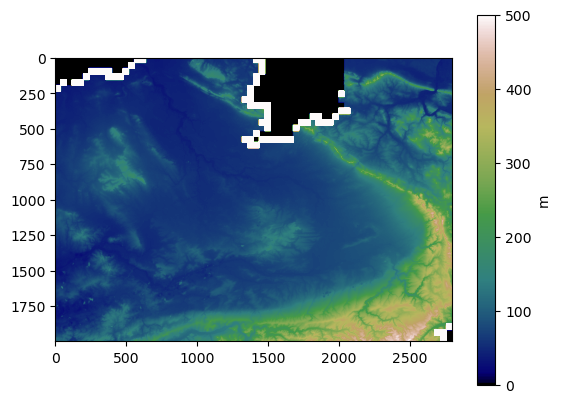

In [9]:
import matplotlib.pyplot as plt

im = plt.imshow(dem.read(1), cmap='gist_earth', vmin=0, vmax=500)
cbar = plt.colorbar(im)
cbar.set_label('m')

In [10]:
topo = mesh.warp_by_scalar(scalars="Elevation [m]", factor=15.0)

topo

StructuredGrid (0x1c883b3dfc0)
  N Cells:      5595201
  N Points:     5600000
  X Bounds:     3.236e+07, 3.250e+07
  Y Bounds:     5.700e+06, 5.800e+06
  Z Bounds:     0.000e+00, 7.557e+03
  Dimensions:   2000, 2800, 1
  N Arrays:     1

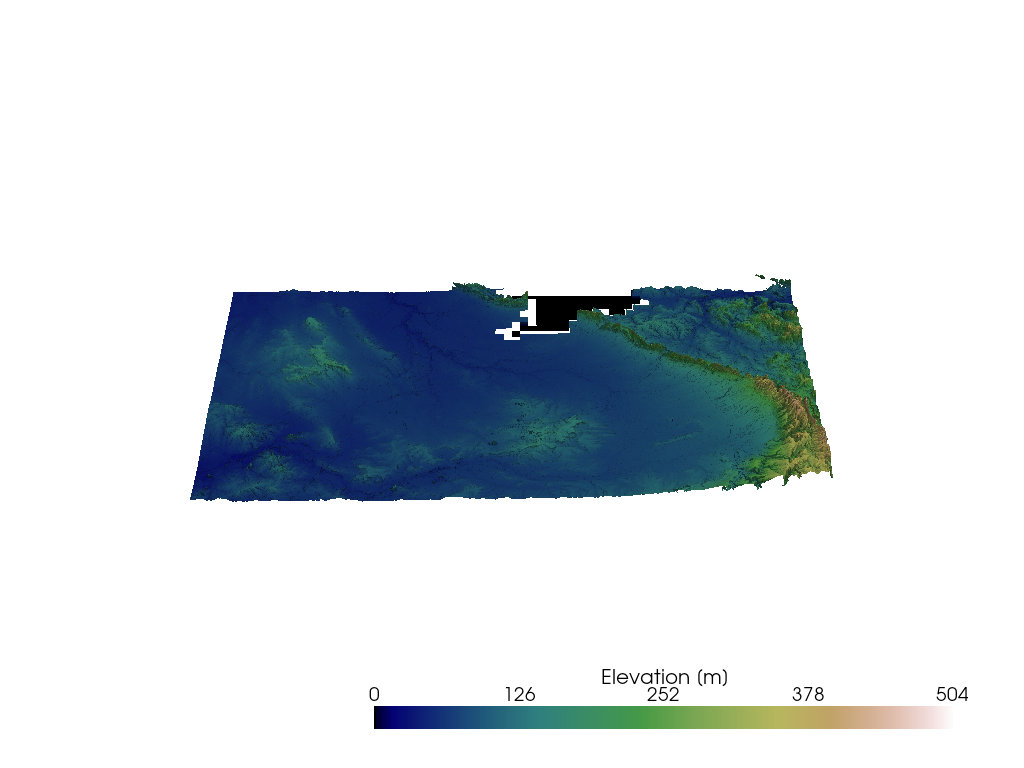

In [11]:
import numpy as np

sargs = dict(fmt="%.0f", color='black')


p = pv.Plotter(notebook=True)

p.add_mesh(mesh=topo, cmap='gist_earth', scalar_bar_args=sargs,
           # clim=[-0, 500]
            )

# set camera position over the origin
p.camera_position = [0, 0, 1]  # Posizione della telecamera
p.camera.azimuth = 0
p.camera.roll = 0
p.camera.elevation = -45

#TODO: compute p.camera.distance

p.show()

In [12]:
wms_map = gg.web.load_as_array('https://ows.terrestris.de/osm/service?',
                             'OSM-WMS', 'default', 'EPSG:4647', [32320000,32500000, 5690000, 5800000], [2800, 2000], 'image/png')

Text(32405000, 5758000, 'Münster')

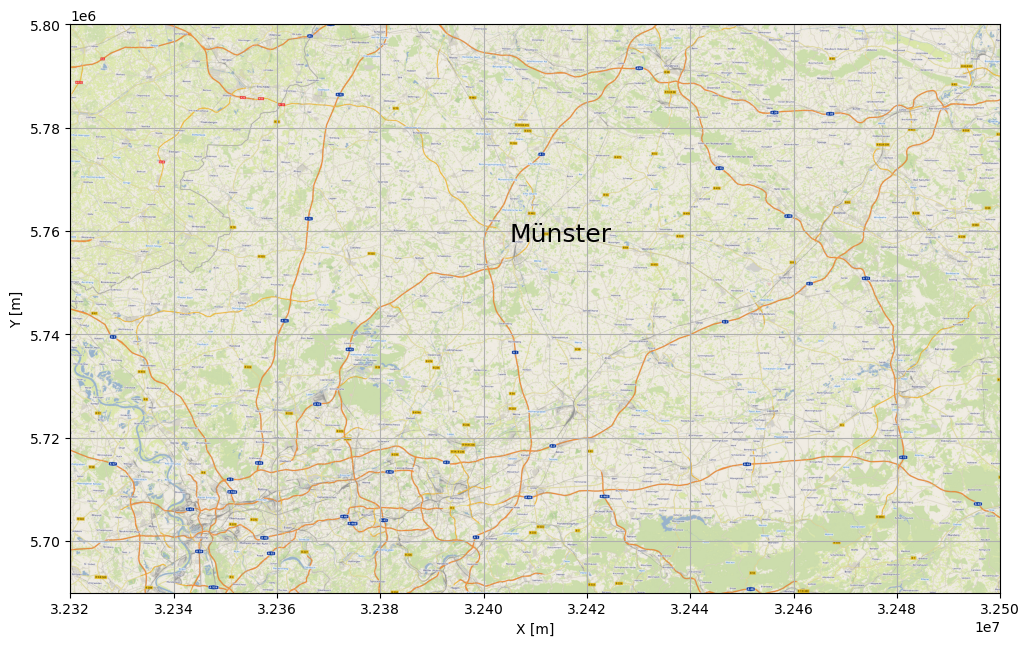

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12,12))
plt.imshow(wms_map, extent= [32320000,32500000, 5690000, 5800000])
plt.grid()
plt.ylabel('Y [m]')
plt.xlabel('X [m]')
plt.text(32405000,5758000, 'Münster', size = 18)

In [14]:
wms_map[0]

array([[0.3529412 , 0.3529412 , 0.48235294, 1.        ],
       [0.40392157, 0.40784314, 0.52156866, 1.        ],
       [0.92941177, 0.92941177, 0.9490196 , 1.        ],
       ...,
       [0.5921569 , 0.69803923, 0.8       , 1.        ],
       [0.61960787, 0.69411767, 0.7647059 , 1.        ],
       [0.8784314 , 0.8666667 , 0.8156863 , 1.        ]], dtype=float32)

In [15]:
wms_map.shape

(2000, 2800, 4)

In [16]:
wms_stacked = gg.visualization.convert_to_rgb(array=wms_map)

wms_stacked[:2]

array([[[ 90,  90, 123],
        [103, 104, 133],
        [237, 237, 242],
        ...,
        [151, 178, 204],
        [158, 177, 195],
        [224, 221, 208]],

       [[255, 255, 255],
        [255, 255, 255],
        [247, 248, 243],
        ...,
        [150, 178, 206],
        [170, 175, 170],
        [250, 249, 243]]], dtype=uint8)

In [17]:
wms_stacked.shape

(2000, 2800, 3)

In [18]:
mesh, texture = gg.visualization.drape_array_over_dem(array=wms_stacked,
                                                      dem=dem)
mesh

StructuredGrid (0x1c887ecc040)
  N Cells:      5595201
  N Points:     5600000
  X Bounds:     3.236e+07, 3.250e+07
  Y Bounds:     5.700e+06, 5.800e+06
  Z Bounds:     0.000e+00, 5.038e+02
  Dimensions:   2000, 2800, 1
  N Arrays:     1

In [19]:
texture

Texture (0x1c887e86ce0)
  Components:   3
  Cube Map:     False
  Dimensions:   2800, 2000

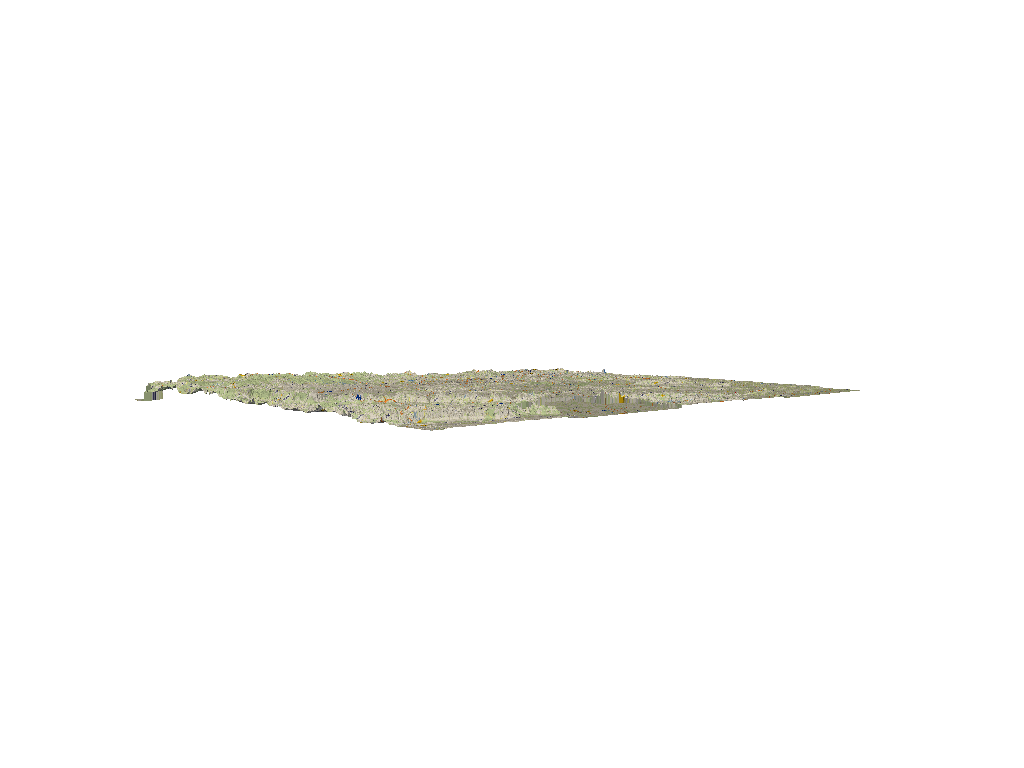

In [20]:
sargs = dict(fmt="%.0f", color='black')


p = pv.Plotter(notebook=True)
p.add_mesh(mesh=mesh, cmap='gist_earth', scalar_bar_args=sargs, texture=texture)

p.set_scale(1,1,10)
p.show()

In [21]:
temp_root_path = None
temp_root_dir.cleanup()